In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
f = open(r'C:\Users\godsf\OneDrive\Desktop\Merisill\meriskill-Internship\Sales-Task\Sales Data.csv')
data = pd.read_csv(f)

In [15]:
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [17]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data['Hour'] = data['Order Date'].dt.hour

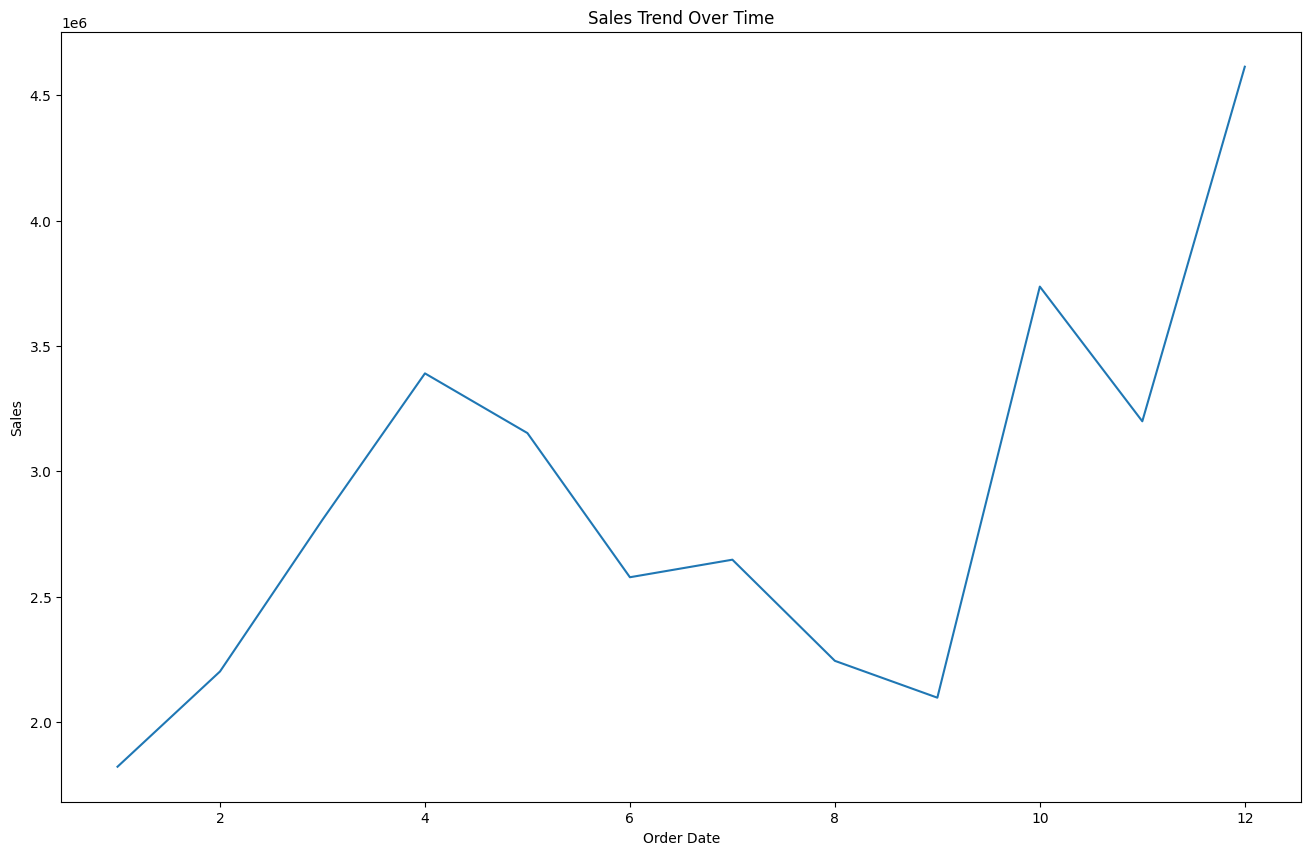

In [23]:
# Sales trend over time using the line chart
plt.figure(figsize=(16, 10))
Monthly_Sales = data.groupby('Month')['Sales'].sum()
sns.lineplot(x=Monthly_Sales.index, y=Monthly_Sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.show()

In [45]:
# Best selling product using tree map
products = data.groupby('Product')['Sales'].sum().sort_values(ascending=False)
tree_map = pd.DataFrame({'Product': products.index, 'Sales': products.values})
fig = px.treemap(tree_map, path=['Product'], values='Sales', title='Best Selling Products')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

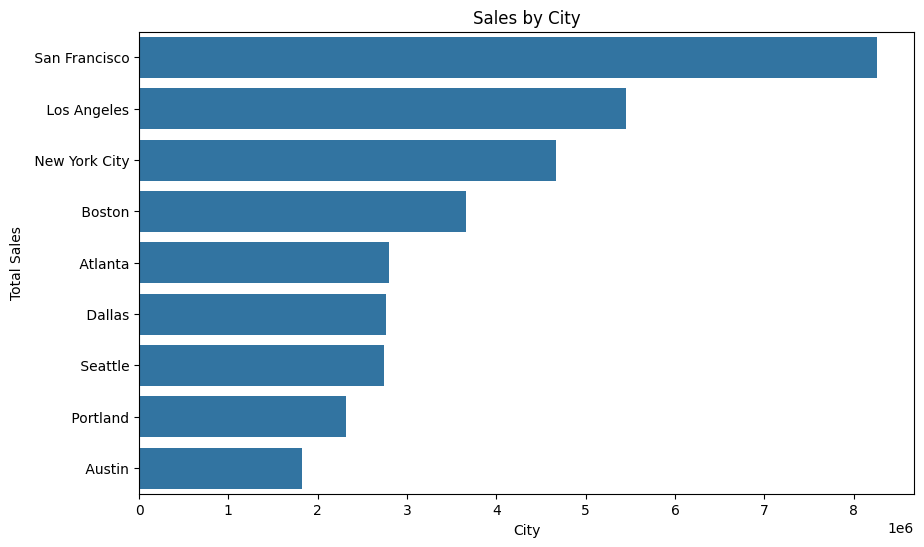

In [35]:
# Top 5 best selling product using stacked bar chart
City_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=City_sales.values, y=City_sales.index, orient='h')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.title('Sales by City')
plt.show()